In [1]:
import pandas as pd
import numpy as np
# Series



s = pd.Series(dict(b=2,c=3,a=1))
print(s)
s = pd.Series(1,index=list('abcde'))
print(s)


b    2
c    3
a    1
dtype: int64
a    1
b    1
c    1
d    1
e    1
dtype: int64


In [2]:
s = pd.Series(np.random.randn(5),index=list('abcde'))
print(s)
# 平均值
print(s.median())
print(s[s>s.median()])
print(s[[4,1,3]])
# 指数e
print(np.exp(s))
print(s.dtype)
print(s.array)
print(s.to_numpy())

a    0.435535
b    2.110548
c   -0.392295
d    0.639539
e    0.321688
dtype: float64
0.4355349157535829
b    2.110548
d    0.639539
dtype: float64
e    0.321688
b    2.110548
d    0.639539
dtype: float64
a    1.545790
b    8.252763
c    0.675505
d    1.895606
e    1.379455
dtype: float64
float64
<PandasArray>
[  0.4355349157535829,   2.1105480973206308, -0.39229518138813746,
   0.6395386070438526,  0.32168832093884464]
Length: 5, dtype: float64
[ 0.43553492  2.1105481  -0.39229518  0.63953861  0.32168832]


In [3]:
s = pd.Series(np.random.randn(5),index=list('abcde'))
print(s[1:])
print(s[:-1])
print(s[1:]+s[:-1])
print((s[1:]+s[:-1]).dropna())

b   -0.761367
c    0.246478
d    0.441113
e    0.826475
dtype: float64
a    0.048060
b   -0.761367
c    0.246478
d    0.441113
dtype: float64
a         NaN
b   -1.522734
c    0.492956
d    0.882226
e         NaN
dtype: float64
b   -1.522734
c    0.492956
d    0.882226
dtype: float64


In [4]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [5]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [6]:
pd.DataFrame(d,index=['a','b','c','d'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [7]:
data = np.zeros((2,),dtype=[('A','i4'),('B','f4'),('C','a10')])

In [8]:
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [9]:
data[:] = [(1,2.0,'hello'),(2,3.0,'world')]

In [10]:
data

array([(1, 2., b'hello'), (2, 3., b'world')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [11]:
pd.DataFrame(data,index=['first','second'])

,A,B,C
first,1,2.0,b'hello'
second,2,3.0,b'world'


In [12]:
pd.DataFrame(data,columns=['C','B','A'])

,C,B,A
0,b'hello',2.0,1
1,b'world',3.0,2


In [13]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [14]:
# from a dict of tuples
pd.DataFrame(
      {
           ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
          ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
         ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
          ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
      }
   )

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [15]:
# from a list of namedtuples
from collections import namedtuple
Point = namedtuple('Point',"x y")
pd.DataFrame([Point(0,0),Point(0,3),(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [16]:
# from a list of dataclasses
from dataclasses import make_dataclass
Point = make_dataclass('Point',[('x',int),('y',int)])
pd.DataFrame([Point(0,0),Point(0,3),Point(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [17]:
Point.__dict__

mappingproxy({'__annotations__': {'x': int, 'y': int},
              '__module__': 'types',
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': 'Point(x: int, y: int)',
              '__dataclass_params__': _DataclassParams(init=True,repr=True,eq=True,order=False,unsafe_hash=False,frozen=False),
              '__dataclass_fields__': {'x': Field(name='x',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7fc403b70580>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fc403b70580>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
               'y': Field(name='y',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7fc403b70580>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fc403b70580>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)},
             

In [18]:
# form_dict orient='index' the keys will be the row labels
pd.DataFrame.from_dict(
            dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
            orient="index",
            columns=["one", "two", "three"],
 )

,one,two,three
A,1,2,3
B,4,5,6


In [19]:
# from_records
data

array([(1, 2., b'hello'), (2, 3., b'world')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [20]:
pd.DataFrame.from_records(data,index = 'C')

,A,B
C,,
b'hello',1,2.0
b'world',2,3.0


In [21]:
d = {
     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
 }
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [22]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [23]:
df['three'] = df['one']* df['two']

In [24]:
df['flag'] = df['one'] > 2
df


,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [25]:
del df['two']
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [26]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [27]:
df['one_trunc'] = df['one'][:2]

In [28]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [29]:
df.insert(1,'bar',df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [30]:
# assign return a copy of data
iris = pd.DataFrame({'SepalLength':[5.1,4.9,4.7,4.6,5.0]})
iris

,SepalLength
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [31]:
iris['SepalWidth'] = [3.5,3.0,3.2,3.1,3.6]
iris['PetalLength'] = [1.4,1.4,1.3,1.5,1.4]
iris['PetalWidth'] = 0.2
iris['Name'] = 'Iris-setosa'

In [32]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
iris.assign(sepal_ratio=iris['SepalWidth']/iris['SepalLength']).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [34]:
iris.assign(sepal_ratio = lambda x:(x['SepalWidth']/x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

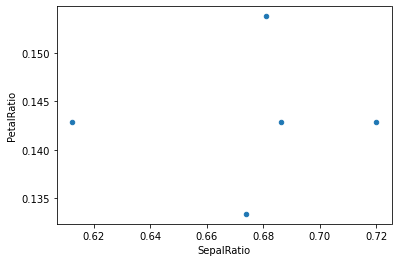

In [35]:
(
    iris.query("SepalLength > 4")
    .assign(
       SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
      PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
   )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

In [36]:
(iris.query("SepalLength > 5")
    .assign(
       SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
      PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
   ))

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio,PetalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275,0.142857


In [37]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [78]:
# indexing/selection
basics = pd.DataFrame(dict(
    Operation = ['Select column','Select row by label','Select row by integer location','Slice rows','Select rows by boolean vector'],
    Syntax = ['df[col]','df.loc[label]','df.iloc[loc]','df[5:10]','df[bool_vec]'],
    Result = ['Series', 'Series', 'Series', 'DataFrame', 'DataFrame']
))
basics

,Operation,Syntax,Result
0,Select column,df[col],Series
1,Select row by label,df.loc[label],Series
2,Select row by integer location,df.iloc[loc],Series
3,Slice rows,df[5:10],DataFrame
4,Select rows by boolean vector,df[bool_vec],DataFrame


In [39]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [40]:
df.loc['b']

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [41]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

In [42]:
# data alignment and arithmetic
df = pd.DataFrame(np.random.randn(10,4),columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randn(7,3),columns=list('ABC'))
df+df2

,A,B,C,D
0,0.555790,0.491636,0.199113,NaN
1,0.319771,0.727045,1.604091,NaN
2,0.022436,1.762541,-0.640935,NaN
3,-3.236533,-2.008515,-1.155780,NaN
4,-1.730727,-2.295345,0.032171,NaN
5,1.994687,-0.621929,-1.779194,NaN
6,2.338359,2.052389,1.402582,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [43]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.936048,0.914405,2.275656,0.672344
2,-0.602479,1.390425,0.471485,0.220828
3,-2.585514,-0.945090,0.328042,0.042149
4,-0.326022,-1.463947,0.336016,0.197820
5,1.407133,0.627685,-0.645078,-0.303370
6,0.475294,0.152738,1.210993,-0.173711
7,-0.321475,0.753555,1.871219,0.625954
8,-2.447922,0.963795,0.386296,-1.316169
9,1.251581,0.236766,-1.265084,1.708647


In [44]:
df * 5 + 2

,A,B,C,D
0,4.496441,1.361898,-0.327083,0.302526
1,-0.183799,5.933925,11.051197,3.664246
2,1.484046,8.314024,2.030340,1.406666
3,-8.431127,-3.363552,1.313125,0.513273
4,2.866331,-5.957836,1.352997,1.291628
5,11.532107,4.500324,-3.552471,-1.214325
6,6.872910,2.125586,5.727880,-0.566029
7,2.889066,5.129673,9.029012,3.432294
8,-7.743169,6.180872,1.604396,-6.278321
9,10.754348,2.545730,-6.652504,8.845759


In [45]:
1/df

,A,B,C,D
0,2.002851,-7.835739,-2.148612,-2.945552
1,-2.289588,1.270995,0.552413,3.004364
2,-9.690784,0.791888,164.799982,-8.426960
3,-0.479335,-0.932218,-7.279349,-3.363092
4,5.771466,-0.628312,-7.727943,-7.058438
5,0.524543,1.999741,-0.900500,-1.555536
6,1.026081,39.813485,1.341245,-1.948536
7,5.623877,1.597611,0.711338,3.490904
8,-0.513180,1.195923,-12.638902,-0.603987
9,0.571145,9.162034,-0.577867,0.730379


In [46]:
df ** 4

,A,B,C,D
0,0.062145,2.652651e-04,4.692104e-02,0.013284
1,0.036389,3.831989e-01,1.073851e+01,0.012274
2,0.000113,2.542992e+00,1.355724e-09,0.000198
3,18.942835,1.324128e+00,3.561474e-04,0.007817
4,0.000901,6.416526e+00,2.803783e-04,0.000403
5,13.209173,6.253241e-02,1.520776e+00,0.170797
6,0.902139,3.979965e-07,3.090064e-01,0.069369
7,0.001000,1.535025e-01,3.905683e+00,0.006734
8,14.418526,4.888635e-01,3.918885e-05,7.514310
9,9.397564,1.419163e-04,8.967827e+00,3.514038


In [47]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [48]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df2

,a,b
0,False,True
1,True,True
2,True,False


In [49]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [50]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [51]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [52]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [53]:
df

,A,B,C,D
0,0.499288,-0.127620,-0.465417,-0.339495
1,-0.436760,0.786785,1.810239,0.332849
2,-0.103191,1.262805,0.006068,-0.118667
3,-2.086225,-1.072710,-0.137375,-0.297345
4,0.173266,-1.591567,-0.129401,-0.141674
5,1.906421,0.500065,-1.110494,-0.642865
6,0.974582,0.025117,0.745576,-0.513206
7,0.177813,0.625935,1.405802,0.286459
8,-1.948634,0.836174,-0.079121,-1.655664
9,1.750870,0.109146,-1.730501,1.369152


In [54]:
# Transposing
df[:5].T

,0,1,2,3,4
A,0.499288,-0.436760,-0.103191,-2.086225,0.173266
B,-0.127620,0.786785,1.262805,-1.072710,-1.591567
C,-0.465417,1.810239,0.006068,-0.137375,-0.129401
D,-0.339495,0.332849,-0.118667,-0.297345,-0.141674


In [57]:
df2 = df

In [59]:
df2.columns = [0,1,2,3]
df2 = df2[:4]

In [61]:
df2*df2.T

,0,1,2,3
0,0.249289,0.055739,0.048027,0.708263
1,0.055739,0.619031,2.285979,-0.357051
2,0.048027,2.285979,0.000037,0.016302
3,0.708263,-0.357051,0.016302,0.088414


In [62]:
# DataFrame interoperability with NumPy functions
np.exp(df)

,0,1,2,3
0,1.647548,0.880187,0.627873,0.712130
1,0.646127,2.196324,6.111910,1.394937
2,0.901955,3.535324,1.006086,0.888104
3,0.124155,0.342080,0.871643,0.742787
4,1.189183,0.203606,0.878622,0.867904
5,6.728966,1.648828,0.329396,0.525784
6,2.650059,1.025435,2.107655,0.598574
7,1.194602,1.869993,4.078798,1.331703
8,0.142469,2.307523,0.923928,0.190965
9,5.759609,1.115325,0.177196,3.932014


In [63]:
np.asarray(df)

array([[ 0.49928826, -0.12762038, -0.46541665, -0.33949489],
       [-0.43675984,  0.78678498,  1.81023939,  0.33284918],
       [-0.10319083,  1.26280489,  0.00606796, -0.11866676],
       [-2.08622548, -1.07271038, -0.13737492, -0.29734541],
       [ 0.17326621, -1.59156723, -0.12940054, -0.14167441],
       [ 1.90642142,  0.50006481, -1.11049426, -0.64286506],
       [ 0.97458201,  0.02511712,  0.74557591, -0.51320575],
       [ 0.17781326,  0.62593451,  1.4058023 ,  0.28645875],
       [-1.94863372,  0.83617445, -0.07912079, -1.65566427],
       [ 1.75086967,  0.10914607, -1.73050081,  1.36915187]])

In [64]:
ser = pd.Series([1,2,3,4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [65]:
ser1 = pd.Series([1,2,3],index = list('abc'))
ser2 = pd.Series([1,3,5],index = list('bac'))
np.remainder(ser1,ser2)

a    1
b    0
c    3
dtype: int64

In [76]:
# info()
pd.DataFrame(np.random.randn(3,12)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float64
 1   1       3 non-null      float64
 2   2       3 non-null      float64
 3   3       3 non-null      float64
 4   4       3 non-null      float64
 5   5       3 non-null      float64
 6   6       3 non-null      float64
 7   7       3 non-null      float64
 8   8       3 non-null      float64
 9   9       3 non-null      float64
 10  10      3 non-null      float64
 11  11      3 non-null      float64
dtypes: float64(12)
memory usage: 416.0 bytes


In [77]:
pd.set_option('display.width',20)
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.004654,-0.317038,-0.034317,0.610478,1.662100,0.232657,0.957484,0.709289,-1.471209,0.102524,0.659012,0.222565
1,-0.934445,0.935017,0.471215,0.232940,0.733654,-0.430919,-0.321757,-0.482906,1.979585,1.036760,-1.871481,2.315999
2,-0.817690,0.239184,-2.645625,-0.449148,-0.615263,-0.762506,0.337913,-0.629899,0.203556,-1.713935,-0.606319,0.255693


In [79]:
basics

,Operation,Syntax,Result
0,Select column,df[col],Series
1,Select row by label,df.loc[label],Series
2,Select row by integer location,df.iloc[loc],Series
3,Slice rows,df[5:10],DataFrame
4,Select rows by boolean vector,df[bool_vec],DataFrame


In [80]:
basics['Operation']

0                     Select column
1               Select row by label
2    Select row by integer location
3                        Slice rows
4     Select rows by boolean vector
Name: Operation, dtype: object

In [84]:
basics.loc[:,['Result']]

,Result
0,Series
1,Series
2,Series
3,DataFrame
4,DataFrame
